First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

<ipython-input-2-da5f29c0375f>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
<ipython-input-2-da5f29c0375f>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

Decision Tree Performance:
Accuracy: 0.76
Precision: 0.71
Recall: 0.69
F1 Score: 0.70

k-NN Model Evaluation:
k-NN Performance:
Accuracy: 0.65
Precision: 0.62
Recall: 0.42
F1 Score: 0.50



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


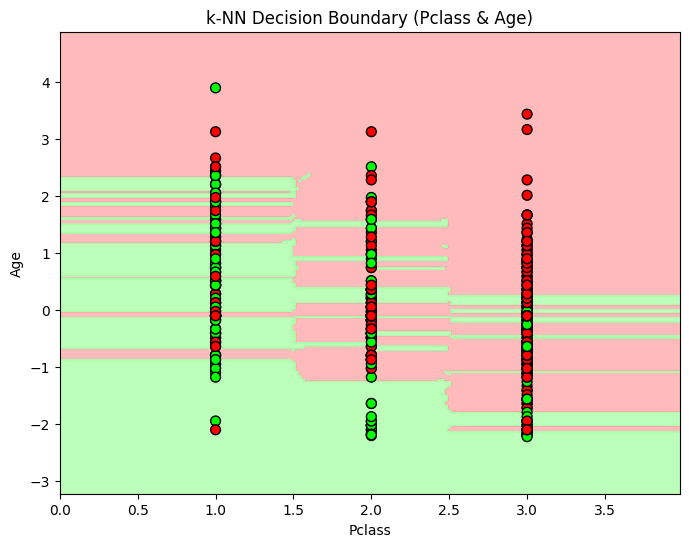

Decision Tree Model Evaluation:
Decision Tree Performance:
Accuracy: 0.67
Precision: 0.69
Recall: 0.38
F1 Score: 0.49



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


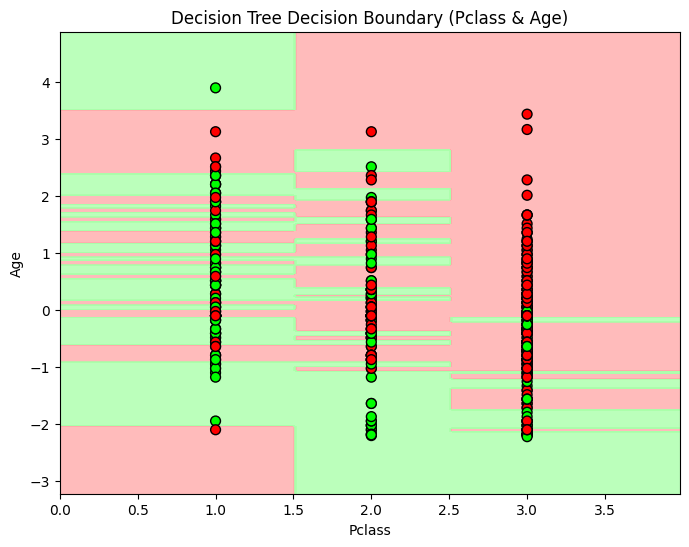

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap

# Load the Titanic dataset
titanic_data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Display the first few rows
print("First 5 rows of the dataset:")
print(titanic_data.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(titanic_data.isnull().sum())

# Handle missing values
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data.drop(columns=['Cabin'], inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)

# Standardize 'Age' and 'Fare'
scaler = StandardScaler()
titanic_data[['Age', 'Fare']] = scaler.fit_transform(titanic_data[['Age', 'Fare']])

# Define features and target variable
X = titanic_data.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])
y = titanic_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train k-NN and Decision Tree models
knn = KNeighborsClassifier(n_neighbors=5)
dtree = DecisionTreeClassifier(random_state=42)
knn.fit(X_train, y_train)
dtree.fit(X_train, y_train)

# Evaluate model performance
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}\n")

knn_pred = knn.predict(X_test)
dtree_pred = dtree.predict(X_test)

evaluate_model(y_test, knn_pred, "k-NN")
evaluate_model(y_test, dtree_pred, "Decision Tree")

# Select 'Pclass' and 'Age' for visualization
X_vis = titanic_data[['Pclass', 'Age']]
y_vis = titanic_data['Survived']

X_vis_train, X_vis_test, y_vis_train, y_vis_test = train_test_split(X_vis, y_vis, test_size=0.3, random_state=42)

# Train models on the visualization dataset
knn_vis = KNeighborsClassifier(n_neighbors=5)
dtree_vis = DecisionTreeClassifier(random_state=42)
knn_vis.fit(X_vis_train, y_vis_train)
dtree_vis.fit(X_vis_train, y_vis_train)

# Plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    X_vis = X.values
    h = .02  # Step size for the mesh

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    colors = ['#FF0000', '#00FF00']

    # Create a mesh grid
    x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
    y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict decision boundaries
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

    # Plot the training points
    plt.scatter(
        X_vis[:, 0], X_vis[:, 1], c=y, cmap=ListedColormap(colors), edgecolor='k', s=50
    )
    plt.title(title)
    plt.xlabel('Pclass')
    plt.ylabel('Age')
    plt.show()

# Evaluate and plot decision boundaries for k-NN
print("k-NN Model Evaluation:")
knn_pred_vis = knn_vis.predict(X_vis_test)
evaluate_model(y_vis_test, knn_pred_vis, "k-NN")
plot_decision_boundary(knn_vis, X_vis_train, y_vis_train, "k-NN Decision Boundary (Pclass & Age)")

# Evaluate and plot decision boundaries for Decision Tree
print("Decision Tree Model Evaluation:")
dtree_pred_vis = dtree_vis.predict(X_vis_test)
evaluate_model(y_vis_test, dtree_pred_vis, "Decision Tree")
plot_decision_boundary(dtree_vis, X_vis_train, y_vis_train, "Decision Tree Decision Boundary (Pclass & Age)")
